In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/ct/43r___2d52b52q4nn_7551y40000gn/T/ipykernel_2506/3390339819.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


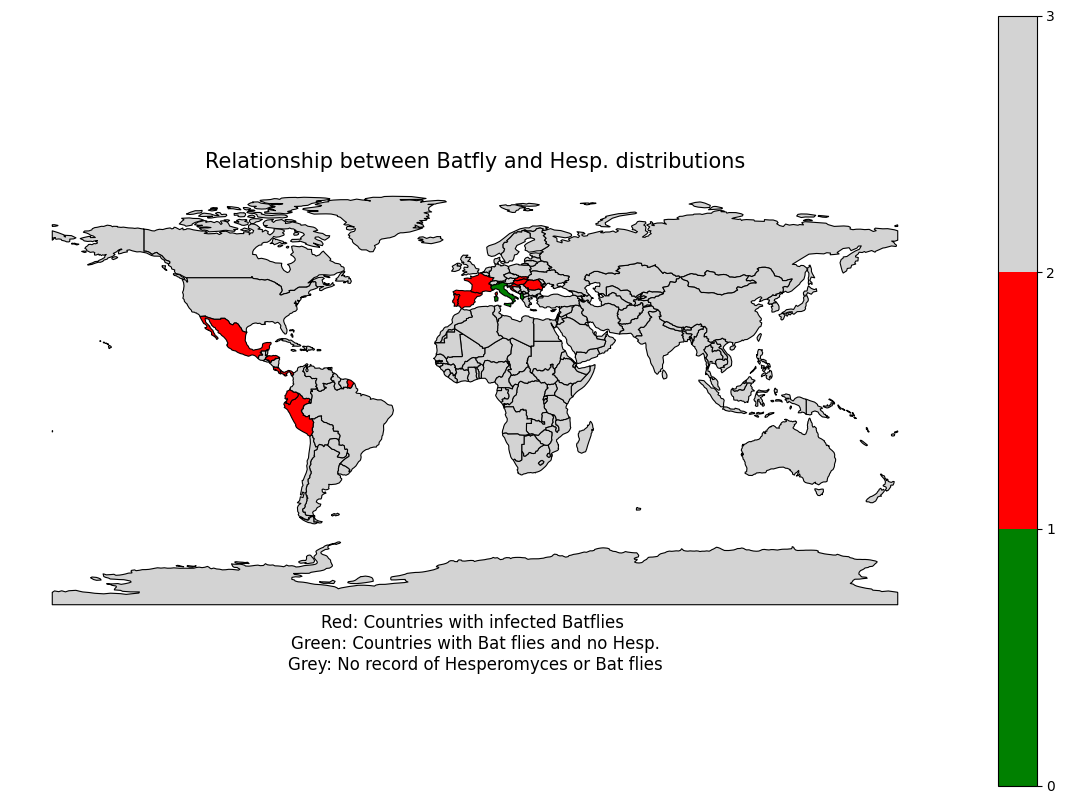

In [12]:
# Step 1: Load the data
df = pd.read_excel("batfly_distributions_for_choropleth_map.xlsx")

# Step 2: Load the shapefile for the world countries
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Step 3: Merge the data with the shapefile based on the 'name' column (country names)
merged_data = world_shapefile.merge(df, left_on='name', right_on='Batfly country', how='left')

# Step 4: Fill missing values (countries not in the merge) with 2
merged_data['Has Hesperomyces?'].fillna(2, inplace=True)

# Step 5: Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))  # Adjust the figsize here for a larger map

# Specify colors for the choropleth map (red for 0, green for 1, and grey for 2)
cmap = plt.cm.colors.ListedColormap(['green', 'red', 'lightgrey'])
bounds = [0, 1, 2, 3]  # The values that correspond to each color in the colormap
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Plot the map with the 'value' column as the color and black borders
merged_data.plot(column='Has Hesperomyces?', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black', legend=True, norm=norm, missing_kwds={'color': 'lightgrey'})

# Set the title
plt.title('Relationship between Batfly and Hesp. distributions', fontsize=15)

# Add a caption
caption_text = "Red: Countries with infected Batflies \nGreen: Countries with Bat flies and no Hesp.\nGrey: No record of Hesperomyces or Bat flies"
plt.text(0.5, -0.1, caption_text, ha='center', fontsize=12, transform=ax.transAxes)

# Remove axis ticks and labels
ax.set_axis_off()

# Show the plot
plt.show()

In [14]:
fig.savefig("choroplethmap of batfly distributions.svg", format="svg")

In [15]:
fig.savefig("choroplethmap of batfly distributions.png", format="png")